In [15]:
import pandas as pd
from fullfrlm import flow_refueling_location_model
from get_abm_data import get_cs_data_batch, get_vessel_data_batch
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
seeds = [259572, 7542, 864199, 11540, 188813, 411862, 546078, 420812, 304196, 814030]

In [3]:
# for seed in seeds:
total_flow, fraction_captured_total, serviceable_fraction, served_fraction, optimal_facilities, \
    non_zero_flows, routes_supported, paths, G, df_abm, df_random_out = flow_refueling_location_model(1, seeds[0], 70000, 40, 600, 2, False, False, False)

Optimal


In [5]:
batch_data = pickle.load(open('ABM/own_work/data/batch_run_result.p', 'rb'))

In [11]:
df_cs = get_cs_data_batch(batch_data)

In [12]:
df_cs

,RunId,iteration,Step,seed,data_completed_trips,AgentID,occupation,max_occupation,avg_line,max_line,charging_stations
286,0,0,11520,892244,"{'id': [0, 1, 4, 8, 9, 5, 7, 15, 2, 3, 20, 6, ...",8866889,0.035714,1.0,0.003968,1.0,1.0
287,0,0,11520,892244,"{'id': [0, 1, 4, 8, 9, 5, 7, 15, 2, 3, 20, 6, ...",30984595,0.177381,2.0,0.000000,0.0,2.0
291,0,0,11520,892244,"{'id': [0, 1, 4, 8, 9, 5, 7, 15, 2, 3, 20, 6, ...",8863818,0.080952,1.0,0.014385,1.0,1.0
293,0,0,11520,892244,"{'id': [0, 1, 4, 8, 9, 5, 7, 15, 2, 3, 20, 6, ...",8864005,0.185913,2.0,0.000000,0.0,2.0
300,0,0,11520,892244,"{'id': [0, 1, 4, 8, 9, 5, 7, 15, 2, 3, 20, 6, ...",8862663,0.278175,2.0,0.001290,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
39138,99,0,11520,176582,"{'id': [5335, 5336, 5326, 5332, 5334, 5327, 53...",22638327,0.054167,1.0,0.007044,1.0,1.0
39139,99,0,11520,176582,"{'id': [5335, 5336, 5326, 5332, 5334, 5327, 53...",8863019,0.110714,1.0,0.003571,1.0,1.0
39140,99,0,11520,176582,"{'id': [5335, 5336, 5326, 5332, 5334, 5327, 53...",8863469,0.112698,1.0,0.000000,0.0,1.0
39148,99,0,11520,176582,"{'id': [5335, 5336, 5326, 5332, 5334, 5327, 53...",8866297,0.041468,1.0,0.000496,1.0,1.0


Text(0.5, 1.0, 'Average occupation charging stations')

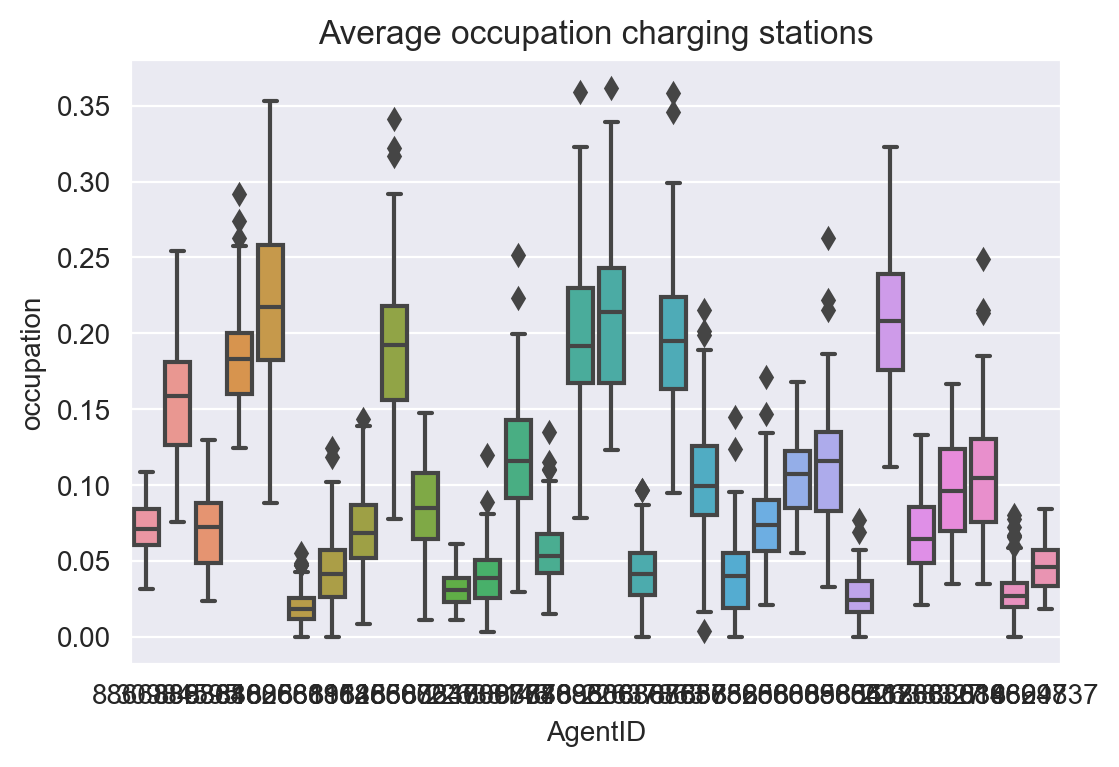

In [22]:
plt.subplots(dpi=200)
sns.boxplot(x='AgentID', y='occupation', data=df_cs)
plt.title('Average occupation charging stations')

Text(0.5, 1.0, 'Average line length')

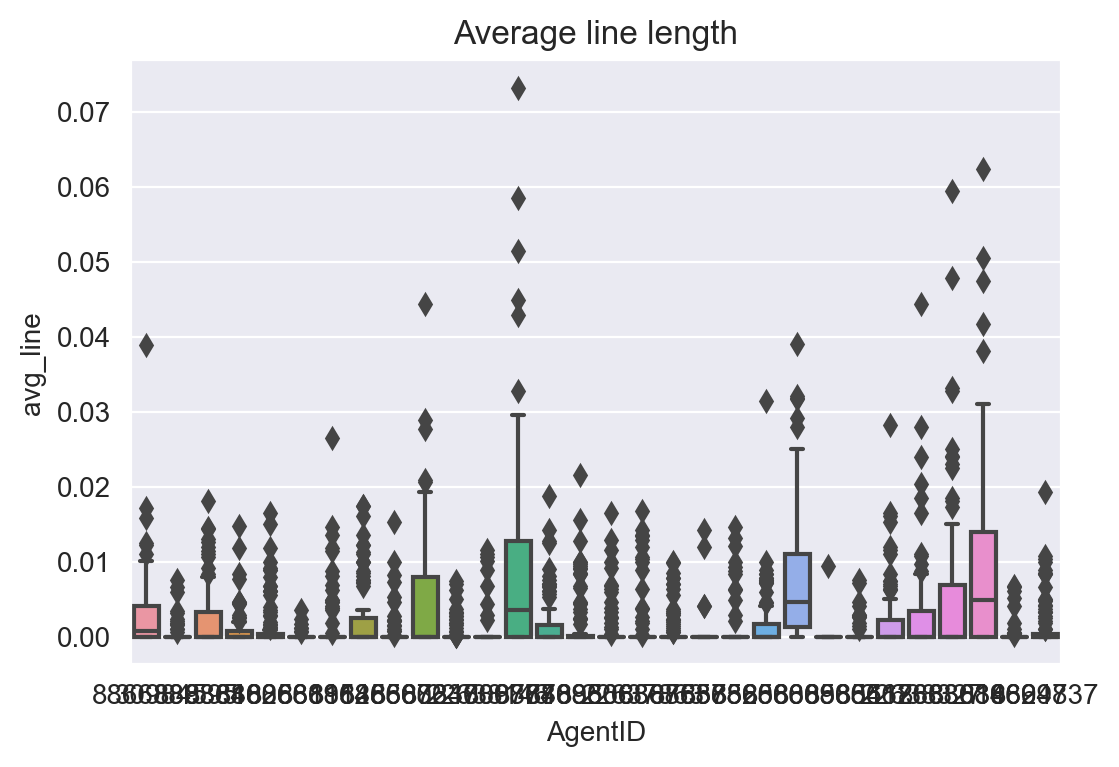

In [21]:
plt.subplots(dpi=200)
sns.boxplot(x='AgentID', y='avg_line', data=df_cs)
plt.title('Average line length')

In [18]:
df_vessels = get_vessel_data_batch(batch_data)

Text(0.5, 1.0, 'Line length')

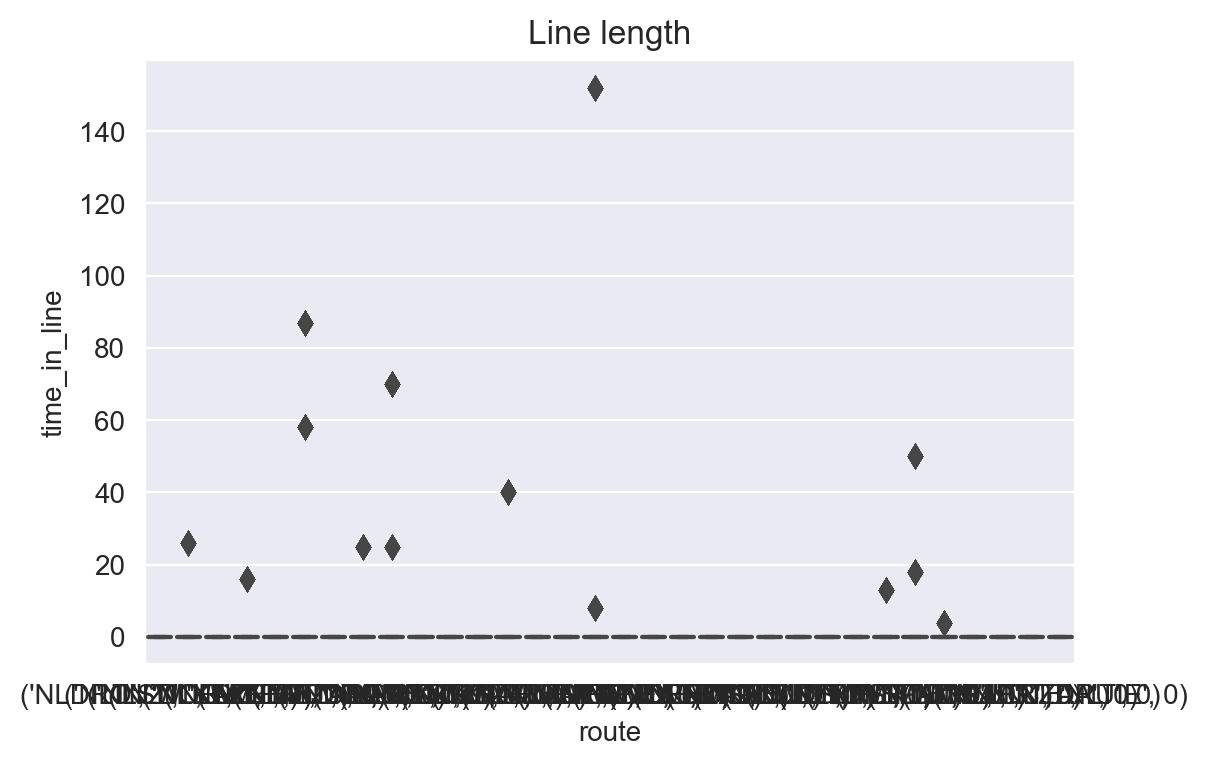

In [20]:
plt.subplots(dpi=200)
sns.boxplot(x='route', y='time_in_line', data=df_vessels)
plt.title('Time in line')

In [10]:
df_vessels.groupby('route').mean().sort_values('time_in_line', ascending=False)

,id,time_departed,travel_time,time_in_line,time_charging,battery_size
route,,,,,,
"(NLVEN, NLBON, 0)",220.636364,6217.363636,242.636364,11.909091,138.000000,6026.363636
"(NLNIJ, NLWAS, 0)",230.700000,6506.300000,229.600000,9.100000,151.900000,5964.000000
"(NLTNZ, NLVLI, 0)",200.733333,5599.133333,110.000000,7.066667,79.666667,5766.533333
"(NLALK, NLIJM, 0)",191.411765,5380.882353,258.000000,2.705882,56.764706,2335.529412
"(NLOOS, NLTLB, 0)",261.866667,7439.266667,127.000000,2.066667,83.666667,6650.000000
"(NLGOR, NLRTM, 0)",201.133333,5807.600000,237.000000,1.133333,112.733333,5455.800000
"(NLRTM, NLAPN, 0)",186.026316,5265.184211,186.000000,1.131579,73.921053,3631.157895
"(NLMOE, NLAPN, 1)",176.500000,4947.000000,317.000000,0.833333,161.000000,6078.333333
"(NLRTM, NLGTB, 1)",144.222222,4159.888889,263.555556,0.000000,119.333333,5148.888889


In [11]:
df_vessels

,id,route,combi,time_departed,travel_time,time_in_line,time_charging,battery_size
0,1,"(NLSWI, NLLEY, 0)",[8863709],16,99,0,67,3220
1,4,"(NLAMS, NLZAA, 0)",[8866763],112,30,0,48,3220
2,7,"(NLDOR, NLRTM, 1)",[8862663],239,130,0,0,9404
3,0,"(NLHAR, NLWTE, 0)","[8865756, 8865605]",13,206,0,167,9404
4,2,"(NLRTM, NLWLK, 1)","[8866893, 8863306]",63,361,0,46,2031
...,...,...,...,...,...,...,...,...
408,406,"(NLRTM, NLMOE, 0)",[8865003],11074,188,0,148,6650
409,407,"(NLUTC, NLTIE, 0)","[8867240, 22638146]",11114,195,0,112,6650
410,412,"(NLRTM, NLAPN, 0)",[8867538],11215,186,0,66,3220
411,409,"(NLRTM, NLMOE, 0)",[8865003],11134,188,0,148,6650


In [18]:
df_cs = get_cs_data_batch(batch_data)
df_cs

,occupation,max_occupation,avg_line,max_line,charging_stations
AgentID,,,,,
8868191,0.024715,1.000,0.000000,0.000,1.0
8866297,0.029725,1.000,0.000000,0.000,1.0
8863709,0.030419,1.000,0.000174,0.125,1.0
8865412,0.032713,1.000,0.000930,0.375,1.0
22638146,0.037636,1.000,0.000000,0.000,1.0
8864111,0.042597,1.000,0.002046,0.250,1.0
8864837,0.045734,1.000,0.000694,0.375,1.0
8868208,0.047321,1.000,0.001426,0.250,1.0
8867395,0.050062,1.000,0.000322,0.125,1.0


In [19]:

df_vessels = get_vessel_data_batch(batch_data)
df_vessels.groupby('route').mean().sort_values('time_in_line', ascending=False)

,id,time_departed,travel_time,time_in_line,time_charging,battery_size
route,,,,,,
"(NLVEN, NLBON, 0)",220.636364,6217.363636,242.636364,11.909091,138.000000,6026.363636
"(NLNIJ, NLWAS, 0)",230.700000,6506.300000,229.600000,9.100000,151.900000,5964.000000
"(NLTNZ, NLVLI, 0)",200.733333,5599.133333,110.000000,7.066667,79.666667,5766.533333
"(NLALK, NLIJM, 0)",191.411765,5380.882353,258.000000,2.705882,56.764706,2335.529412
"(NLOOS, NLTLB, 0)",261.866667,7439.266667,127.000000,2.066667,83.666667,6650.000000
"(NLGOR, NLRTM, 0)",201.133333,5807.600000,237.000000,1.133333,112.733333,5455.800000
"(NLRTM, NLAPN, 0)",186.026316,5265.184211,186.000000,1.131579,73.921053,3631.157895
"(NLMOE, NLAPN, 1)",176.500000,4947.000000,317.000000,0.833333,161.000000,6078.333333
"(NLRTM, NLGTB, 1)",144.222222,4159.888889,263.555556,0.000000,119.333333,5148.888889
